<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Air_quality2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# load time series and data preparation libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [74]:
!pip install openml

In [75]:
import arff

## **Converting my dataset from arff format to dataframe in pandas**

In [76]:
#Load ARFF file
with open('/content/air_dataset.arff', 'r') as file:
  dataset = arff.load(file)

#Convert to DataFrame
air = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [77]:
air.to_csv('air_quality_data.csv', index=True)

## **Data Cleaning**

In [78]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [79]:
air.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


In [80]:
missing_percent = air.isnull().mean()*100
missing_percent

,0
No,0.000000
year,0.000000
month,0.000000
day,0.000000
hour,0.000000
PM2.5,2.076916
PM10,1.532674
SO2,2.143937
NO2,2.879497
CO,4.919813


In [81]:
air.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

<Axes: >

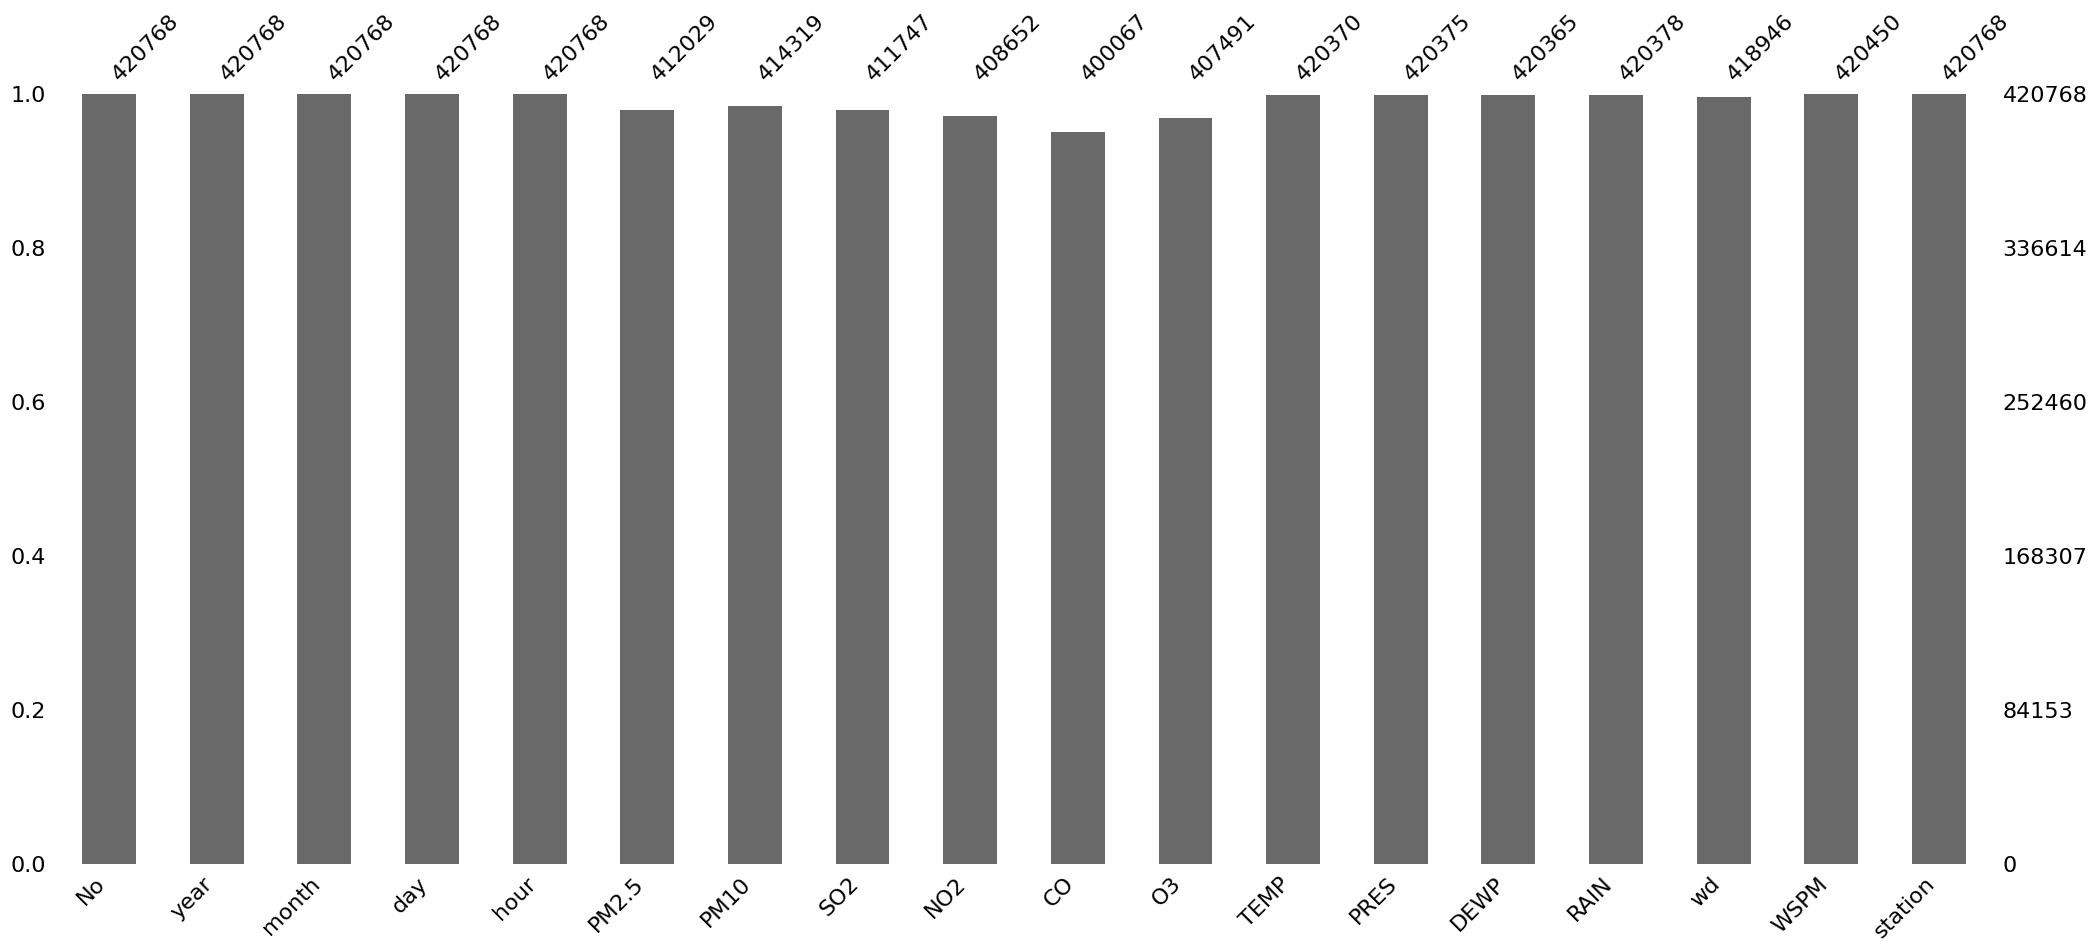

In [82]:
msno.bar(air)

In [83]:
# Using interpolation to fill in the missing values
air.interpolate(method='linear', inplace=True)

<ipython-input-83-ff86c8614d66>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  air.interpolate(method='linear', inplace=True)


In [84]:
air.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [85]:
#dropping the wd colum
air.drop(['wd', 'station'], axis=1, inplace=True)

In [86]:
air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0


In [87]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   No      420768 non-null  int64  
 1   year    420768 non-null  int64  
 2   month   420768 non-null  int64  
 3   day     420768 non-null  int64  
 4   hour    420768 non-null  int64  
 5   PM2.5   420768 non-null  float64
 6   PM10    420768 non-null  float64
 7   SO2     420768 non-null  float64
 8   NO2     420768 non-null  float64
 9   CO      420768 non-null  float64
 10  O3      420768 non-null  float64
 11  TEMP    420768 non-null  float64
 12  PRES    420768 non-null  float64
 13  DEWP    420768 non-null  float64
 14  RAIN    420768 non-null  float64
 15  WSPM    420768 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 51.4 MB


In [88]:
#Creating a date column, setting as index and also a frequency of daily
air['Date'] = pd.to_datetime(air[['year', 'month', 'day']])


air.set_index('Date', inplace=True)
air = air.resample('MS').sum().interpolate(method='linear')
air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Date,,,,,,,,,,,,,,,,
2013-03-01,3325680,17972064,26784,142848,102672,933618.000000,1.162870e+06,343998.250400,600686.344300,1.294486e+07,503034.058800,53498.8,9037139.2,-59657.7,212.2,16841.9
2013-04-01,9542880,17392320,34560,133920,99360,537471.000000,8.288482e+05,178734.520876,398661.494117,7.719344e+06,535852.720037,106963.7,8707494.1,-27679.8,123.5,20159.8
2013-05-01,16396272,17972064,44640,142848,102672,730993.500000,1.199999e+06,235492.438724,447845.947483,8.924776e+06,779730.471363,193529.5,8951685.2,72597.0,51.7,16174.8
2013-06-01,22191840,17392320,51840,133920,99360,877324.973684,1.001026e+06,117567.061467,415651.365322,1.154800e+07,642184.472150,203760.8,8636888.2,150681.8,1093.2,11122.7
2013-07-01,29466864,17972064,62496,142848,102672,596744.526316,6.823145e+05,64938.094683,345393.677428,8.780222e+06,701597.516850,242027.6,8887839.0,186614.7,2459.2,11757.4


In [89]:
#Dropping the year, month, day and hour column since i do not need them
air.drop(['No', 'year', 'month', 'day', 'hour'], axis=1, inplace=True)

In [90]:
air.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Date,,,,,,,,,,,
2013-03-01,933618.000000,1.162870e+06,343998.250400,600686.344300,1.294486e+07,503034.058800,53498.8,9037139.2,-59657.7,212.2,16841.9
2013-04-01,537471.000000,8.288482e+05,178734.520876,398661.494117,7.719344e+06,535852.720037,106963.7,8707494.1,-27679.8,123.5,20159.8
2013-05-01,730993.500000,1.199999e+06,235492.438724,447845.947483,8.924776e+06,779730.471363,193529.5,8951685.2,72597.0,51.7,16174.8
2013-06-01,877324.973684,1.001026e+06,117567.061467,415651.365322,1.154800e+07,642184.472150,203760.8,8636888.2,150681.8,1093.2,11122.7
2013-07-01,596744.526316,6.823145e+05,64938.094683,345393.677428,8.780222e+06,701597.516850,242027.6,8887839.0,186614.7,2459.2,11757.4


In [91]:
air.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM'],
      dtype='object')

In [92]:
air.tail()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
Date,,,,,,,,,,,
2016-10-01,764144.5,899028.0,38547.3,475819.0,10051150.0,212244.5,116575.008452,9.066321e+06,63379.00,1007.0,12996.7
2016-11-01,841859.0,1126007.5,96067.2,567152.0,15153250.0,144622.0,36274.100000,8.803450e+06,-36871.20,92.4,13856.5
2016-12-01,1149330.0,1335337.5,152217.5,691895.0,21620650.0,159534.5,2020.000000,9.122558e+06,-87445.80,0.0,13380.8
2017-01-01,1015380.0,1193831.5,165659.0,563401.5,18198950.0,303308.0,-12723.297888,9.135445e+06,-118051.35,2.9,17807.3
2017-02-01,554815.0,690255.0,141995.0,408810.0,9285500.0,375584.0,18942.581667,8.228194e+06,-110603.10,44.9,16220.5


In [93]:
#Changing the dtype of the selected columns
cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'WSPM']

for col in cols:
  air[col] = air[col].astype(int)
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-01 to 2017-02-01
Freq: MS
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   48 non-null     int64
 1   PM10    48 non-null     int64
 2   SO2     48 non-null     int64
 3   NO2     48 non-null     int64
 4   CO      48 non-null     int64
 5   O3      48 non-null     int64
 6   TEMP    48 non-null     int64
 7   PRES    48 non-null     int64
 8   DEWP    48 non-null     int64
 9   RAIN    48 non-null     int64
 10  WSPM    48 non-null     int64
dtypes: int64(11)
memory usage: 4.5 KB


## **Plot the source data**

[Text(0.5, 0, ''), Text(0, 0.5, 'Amount of temperature')]

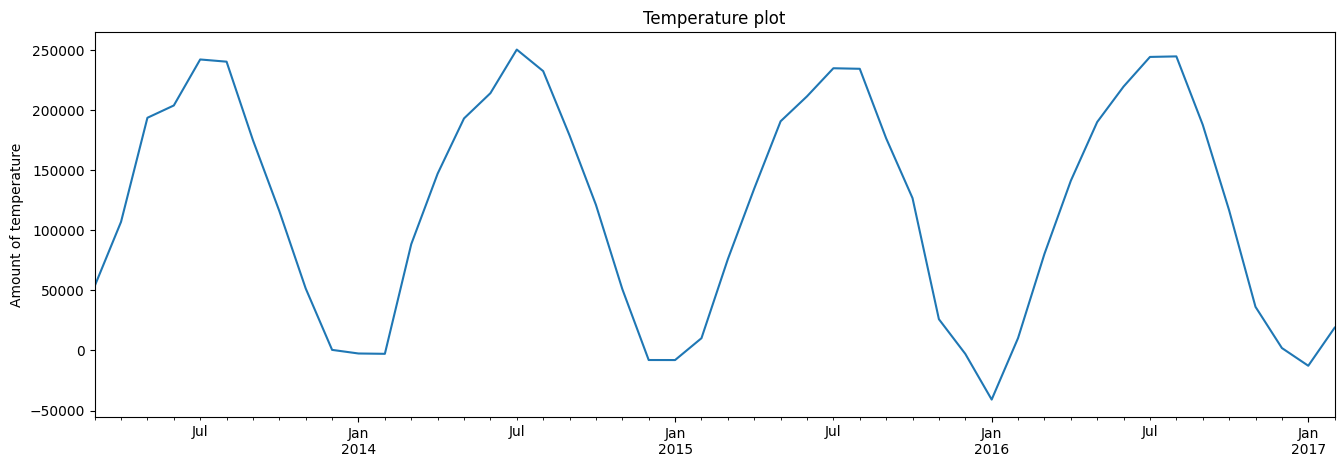

In [94]:
#Source data to show how temperature
title = 'Temperature plot'
ylabel = 'Amount of temperature'
xlabel = ''

ax = air['TEMP'].plot(figsize=(16, 5), title=title)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = xlabel, ylabel = ylabel)

## **Run an ETS Decomposition**

In [95]:
!pip install pmdarima

In [97]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [96]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2013-03-01 to 2017-02-01
Freq: MS
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   48 non-null     int64
 1   PM10    48 non-null     int64
 2   SO2     48 non-null     int64
 3   NO2     48 non-null     int64
 4   CO      48 non-null     int64
 5   O3      48 non-null     int64
 6   TEMP    48 non-null     int64
 7   PRES    48 non-null     int64
 8   DEWP    48 non-null     int64
 9   RAIN    48 non-null     int64
 10  WSPM    48 non-null     int64
dtypes: int64(11)
memory usage: 4.5 KB


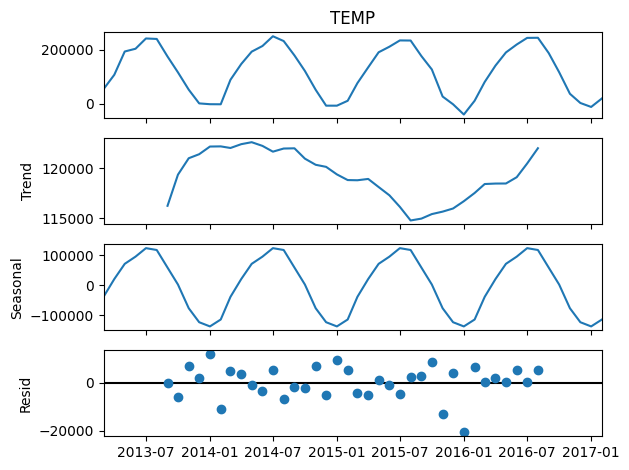

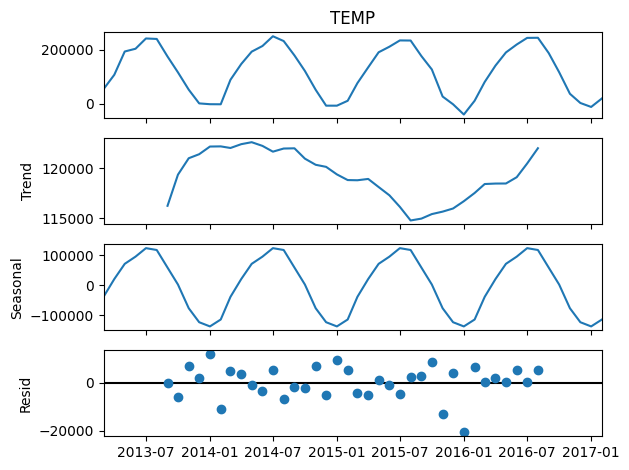

In [98]:
#Decomposition on the temperature column
result = seasonal_decompose(air['TEMP'], model='additive', period=12)
result.plot()

The trend seems to rise and fall seeming cyclic.
There is  seasonality.

## Test for stationarity

In [99]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [100]:
adf_test(air['TEMP'])

Augmented Dickey-Fuller Test: 
ADF test statistic      -5.626377
p-value                  0.000001
# lags used              8.000000
# observations          39.000000
critical value (1%)     -3.610400
critical value (5%)     -2.939109
critical value (10%)    -2.608063
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [101]:
auto_arima(air['TEMP'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -388.213
Date:                            Tue, 27 Aug 2024   AIC                            784.425
Time:                                    06:11:57   BIC                            790.760
Sample:                                03-01-2013   HQIC                           786.636
                                     - 02-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8862      0.034     26.260      0.000       0.820       0.952
ma.L1         -0.7313      0.142     -5.156      0.000      -1.009      -0.453
ma.S.L12      -0.0756      0.050     -1.500      0.134      -0.174       0.023
sigma2      1.356e+08   2.14e-10   6.33e+17      0.000    1.36e+08    1.36e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 2.45
Prob(Q):                              0.45   Prob(JB):                         0.29
Heteroskedasticity (H):               0.89   Skew:                            -0.64
Prob(H) (two-sided):                  0.84   Kurtosis:                         3.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.55e+35. Standard errors may be unstable.
"""

This provides an ARMA model (1, 0, 1) capturing short-term dynamics and a SARIMAX(0, 1, 1, 12)model showing seasonality with a yearly cycle

### Split the data into train/test sets

In [102]:
len(air)

48

In [105]:
#Setting 6 months for testing
train = air.iloc[:24]
test = air.iloc[24:]

### **Fitting a SARIMA model(1, 0, 1)(0, 1, 1, 12)**

In [107]:
help(SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  SARIMAX(endog, exog=None, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, measurement_error=False, time_varying_regression=False, mle_regression=True, simple_differencing=False, enforce_stationarity=True, enforce_invertibility=True, hamilton_representation=False, concentrate_scale=False, trend_offset=1, use_exact_diffuse=False, dates=None, freq=None, missing='none', validate_specification=True, **kwargs)
 |  
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA p

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [111]:
model = SARIMAX(train['TEMP'], order=(1, 0, 1), seasonal_order=(0, 1, 1,12), enforce_invertibility=False)
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               TEMP   No. Observations:                   24
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -129.471
Date:                            Tue, 27 Aug 2024   AIC                            266.942
Time:                                    06:31:29   BIC                            268.881
Sample:                                03-01-2013   HQIC                           266.223
                                     - 02-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8862      0.037     24.198      0.000       0.814       0.958
ma.L1         -1.4070      0.260     -5.416      0.000      -1.916      -0.898
ma.S.L12      -0.0631      0.035     -1.828      0.068      -0.131       0.005
sigma2      3.395e+07   4.95e-09   6.85e+15      0.000     3.4e+07     3.4e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.80   Prob(JB):                         0.78
Heteroskedasticity (H):               0.81   Skew:                             0.20
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.25e+31. Standard errors may be unstable.
"""

In [115]:
#Obtain predicted values
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1, 0, 1)(0, 1,1, 12) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Amount of temperature')]

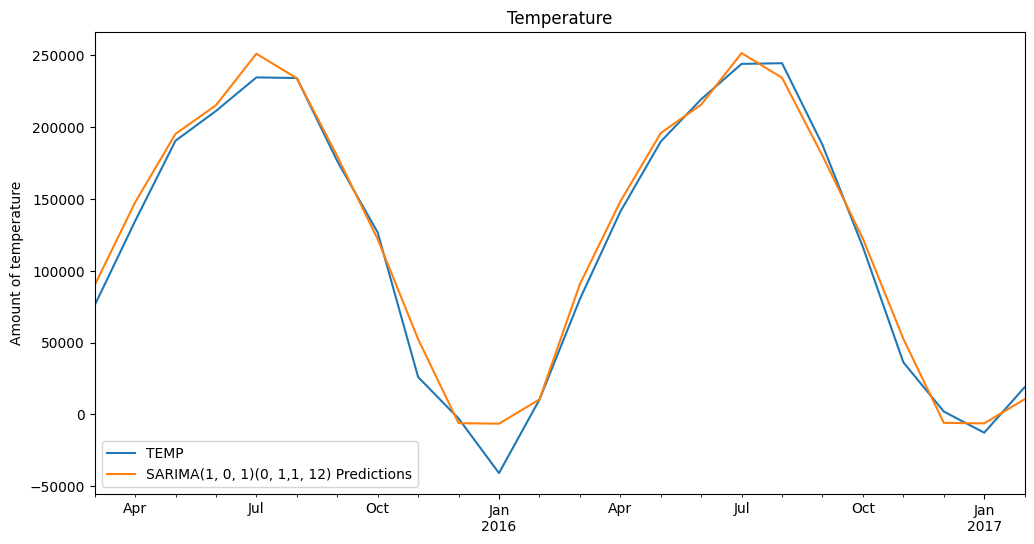

In [116]:
#Plot Predictions against against known values
title = 'Temperature'
ylabel = 'Amount of temperature'
xlabel = ''

ax = test['TEMP'].plot(legend=True, figsize=(12, 6), title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)


### Evaluate the Model

In [ ]:
from statsmodels